# Goal of the project

The goal of this project is to control a 2D quadrotor to perform acrobatic moves. There are 4 parts of the project, where you will build controllers of increasing complexity. The last part will lead to the implementation of the iterative LQR (iLQR) algorithm.

## Instructions
Answer all the questions in the 4 parts below. You will need to submit:
1. A report (pdf format only - every other format will be rejected) answering all the questions that do not request code. DO NOT include code in the report.
2. One (or several) Jupyter notebook(s) containing all the code used to answer the questions. The notebook(s) should be runnable as is.

## 2D quadrotor

The quadrotor is depicted in the following figure <img src='quadrotor.png' width="300">
The quadrotor model is written as
$$\begin{align} 
\dot{x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\ 
\dot{y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $x$ is the horizontal and $y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $z = [x, v_x, y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines useful constants (mass, length, gravity, etc) and functions to simulate and animate the quadrotor as shown below.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import quadrotor

In [2]:
# we can get its mass, half length (r), gravity constant
print(f'm is {quadrotor.MASS}')
print(f'r is {quadrotor.LENGTH}')
print(f'I is {quadrotor.INERTIA}')
print(f'g is {quadrotor.GRAVITY}')

# we can also get the integration step used in the simulation
print(f'dt is {quadrotor.DELTA_T}')

# we can get the size of its state and control vector
print(f'number of states {quadrotor.NUMBER_STATES} and number of controls {quadrotor.NUMBER_CONTROLS}')
print('the states are indexed as follows: x, vx, y, vy, theta, omega')

m is 0.6
r is 0.2
I is 0.15
g is 9.81
dt is 0.01
number of states 6 and number of controls 2
the states are indexed as follows: x, vx, y, vy, theta, omega


## Part 1 - Setting up
1. Discretize the system dynamics using the method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. Assume that the robot starts at an arbitrary position $x(0) = x_0$, $y(0) = y_0$ and $\theta(0) = 0$ with 0 velocities. Compute $u_1^*$ and $u_2^*$ such that the robot stays at this position forever after (you may test your answer using the simulation below).
3. Analyzing the system dynamics, is it possible to move in the x direction while keeping $\theta = 0$? Explain why.
4. Analyzing the system dynamics, is it possible to have the system at rest with $\theta = \frac{\pi}{2}$ (i.e. have the quadrotor in a vertical position)? Explain why.

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAJShtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Ev9liIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLinTkrRqis8WtrPmCEZAG09t
BnlUGDyrF7431X9Ggsrr4v6OxH3Opz8Upv6jIHjIzP5WqIZIDUCZJTtQl68zbgvt7J2ra/bwZpM6
paowcJtM5ZPE24z39rF9EoPALouyjTBUL7cdrRruf2amRzdb5SfnlyLpNJsUyMUXdvUxZRHKRZsI
nzk9CHf6mmhFzeMa8GeYkaWJcEqg2wO48jlPNGeCIpIkj77FEgAAAwAAAwAAAwAACnRUDZr9qtYv
E/CgEdPBnShcaoVlbvjrHnAdJyQ9/h4Y2MNJLgTeH/2ubsafAQmv/f4fxiuVoM5NHnHCOA54iXCH
kF23qB2RT/9mtKLPwDyxErginenOpAma7GsG6y6lk6cEIKAHUYC1dFOeeYX/OjO/h73WT8xDvoQi
bOpMhvbWf0/13uvhOPhy2RxvdAsmhD2hkt4/+ZmB4NzAOA0YZrzxLorC4DWUlgtWFaQAqClxr6lD
I8CbN2rG9WaoD6f344CRn5XzDeGwleLIOUnMlBF+0ccP9RkqY6i/aA5Vgbrmew/+kHLtlOHE842O
q1qkfNnUjpn+e18lCdEr9QypkDsxYGnAXbIBtDw5dGAgIqP8n7PCr0NCzlqmsbnY3z7B3JnDo6kq
ei3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIt7rH1nPHKLkLbhvTk9IT6FH4SCC
iGYjFxmHR6WAoNFjyaUKodxvESbn3hE4TZ0nN+XYOql3Yz4xLmu4Ws5YZk03VtUeWZ9sFOl8eD1b
ZTEn5rZHecMNohlkivHAATWdTw3DolGULj/hmh37YrqMImNsGUtimQWyTeiDxgPgrbnRVNJvd1NL
OEP0jZkGeZybTRyjC31/9gvHJm0M8eTsemVvPT1bdz5bN3wDJfIB8r9lJEe1zyGpFqNfmCIewsp6
9lJc5hd2k7NZoyZMUncBomQaPr92h1zHadqjwVF197bssfcgxvLfFnAuccafB9tGiDrGNDBcK7yt
A3EZHH10pDl6mNvx/dtP2p4cK9AVb/Kh6nL5kWB8wetr+b+v8kIxYZ6x1ioMVviWKcsCgGZUxV4n
3fxe/47oCEV5nBK21GE6SXo1Y7RBjpDdooLTFzroNUe23FUL+/BuPujhONlgJKctOH/Eo2xWrKcH
7vg4AADrHNRHavx5AAASVvs6oEzYaAFir5DaqT6OiQFkGvq796mVMATIbXq6dY7x8mnxu4EC7qX0
QmQHg3KEzSBuHN3mKuOur4vRPiK2B2P902F3rQP1HOqCOhSQ0YkGPh/2daZsILKmNqM/Najyp4b6
sfSqVvIarvv71kBygUCRjxRqzx6JbPIuTzf7BUcc3QJIrd2TOwFFKRRTswd9CwqxFfEodKD2IT5Z
JLyjItAZPEe8O+HawFxD9UxUVmtSL2LlfKOZVUY8ULFoKjzZWGFb++I/rL39oaJte/oFGheIBX3I
9mCqk2Aioq/jLN2ieMwC/jzrcX+f6R5OdBXWaDRScPsBnOVWK+HnQBcj5k6GITJpIYKKOc88gFTk
dkNMlWmRH3mvemetrW3bpditpwPz/OnP25ik59eReZOmT+wDM+/jDfeVCqb6YmtQMcPx6tHSdEF1
6etjUc/0NYAWWmBrx+OmvCVe6R/EZWBcqJmLC7d9mr2kmMc6jVm0SkNEmmuL2HrAaO7Jex5+RYPv
1kImcncsZ9oShUobB6F1EPMipbvU6rHvBW9BUCG3RLWYYZWDL26SlTZwzW8rH9mNBMY52z5noU2A
Nkd5VsQCJDCHWezWsz5j5k3553cPEyAjNWagdoj/ewnuuGAtFM70325rMMrcKRzWGutEVT9BRsy4
NzGU7ABABBmVK9vQW8TlE5hqRjpwuardf86ECAjZyc9G2lB808jd85d1SBy4StcfJtbqJK4ObQgq
45rY+2spQcXkTobz4/FWAPtNXvTqW0L+byEMuVoD3pvpXW7FBGVfpS3IeIlWt/NoM1YABFB8Csvx
3GF0TPfS2S99YNTwuPP/i1mkZ73vav0pQ5ACq0hf3RLLgM8UUa7CM3BM3oJ8T6MNFY9sBgd3F2rN
QP7q9qgPLk8p2NbxmSDE8+x+vNYcKC02iIB8lv/3aVrUPRTYNecx8NUSKZ2lUaUYURbZLwd6UNOD
KdPlzCloXqF6LQf5vvklp

<IPython.core.display.Javascript object>


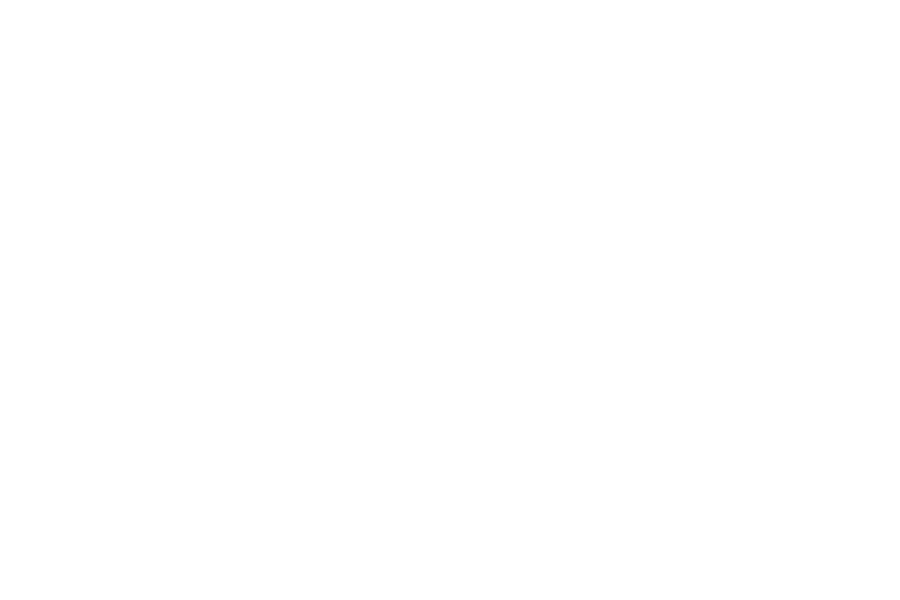

<IPython.core.display.Javascript object>


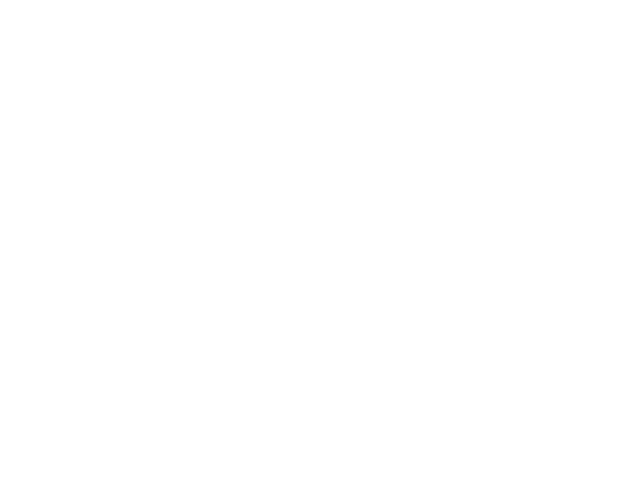

Text(0.5, 0, 'Time [s]')

In [3]:
#Part 1 (Setup)
#Making drone hover at origin (nominal controller)
horizon_length = 1000
import discretizeDynamics
part1Solver = discretizeDynamics.solver(horizon_length = horizon_length)
z0 = np.array([0., 0., 0., 0., 0, 0.])
t, state, u = quadrotor.simulate(z0, part1Solver.nominal_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAOrttZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EuBliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V3pz9EVxs4WbjLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLinTkrRqis8WtrPmCEZAG09t
BnlUGDyrF7431X9Ggsrr4v6OxH3Opz8Upv6jIHjIzP5WqIZIDUCZJTtQl68zbgvt7J2ra/bwZpM6
paowcJtM5ZPE24z39rF9EoPALouyjTBUL7cdrRruf2amRzdb5SfnlyLpNJsUyMUXdvUxZRHKRZsI
nzk9CHf6mmhFzeMa8GeYkaWJcEqg2wO48jlPNGeCIpIkj77FEgAAAwAAAwAAAwAACnRUDZr9qtYv
E/CgEdPBnShcaoVlbvjrHnAdJyQ9/h4Y2MNJLgTeH/2ubsafAQmv/f4fxiuVoM5NHnHCOA54iXCH
kF23qB2RT/9mtKLPwDyxErginenOpAma7GsG6y6lk6cEIKAHUYC1dFOeeYX/OjO/h73WT8xDvoQi
bOpMhvbWf0/13uvhOPhy2RxvdAsmhD2hkt4/+ZmB4NzAOA0YZrzxLorC4DWUlgtWFaQAqClxr6lD
I8CbN2rG9WaoD6f344CRn5XzDeGwleLIOUnMlBF+0ccP9RkqY6i/aA5Vgbrmew/+kHLtlOHE842O
q1qkfNnUjpn+e18lCdEr9QypkDsxYGnAXbIBtDw5dGAgIqP8n7PCr0NCzlqmsbnY3z7B3JnDo6kq
ei3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIt7rH1nPHKLkLbhvTk9IT6FH4SCC
iGYjFxmHR6WAoNFjyaUKodxvESbn3hE4TZ0nN+XYOql3Yz4xLmu4Ws5YZk03VtUeWZ9sFOl8eD1b
ZTEn5rZHecMNohlkivHAATWdTw3DolGULj/hmh37YrqMImNsGUtimQWyTeiDxgPgrbnRVNJvd1NL
OEP0jZkGeZybTRyjC31/9gvHJm0M8eTsemVvPT1bdz5bN3wDJfIB8r9lJEe1zyGpFqNfmCIewsp6
9lJc5hd2k7NZoyZMUncBomQaPr92h1zHadqjwVF197bssfcgxvLfFnAuccafB9tGiDrGNDBcK7yt
A3EZHH10pDl6mNvx/dtP2p4cK9AVb/Kh6nL5kWB8wetr+b+v8kIxYZ6x1ioMVviWKcsCgGZUxV4n
3fxe/47oCEV5nBK21GE6SXo1Y7RBjpDdooLTFzroNUe5G7U2vbfJBo4XDaL2oGDNmNDkbpbfquD9
6QcAAB1jn8jtX58gAAJK33DUCZtNACxV8lqEK+fjtojM11dNGlntZ1scZc7NStn0pdpI7Yw4reLv
qHw8RMxM8lC0eCrU8FzIeO+vnl6llfpEawj2oherJMvZSWRXxkGO8qs9ATpDOZaQ5Ga/Sf0ANSx8
LwN6emNLlg8DfsFtA59pvHj0w/0PYX34fhD1rpBgd/rtmYDE4oC8ePnzWJkMPJxITHUM6L3N56pI
QWy5UQOkiVkbaq0KTUnXR9COBXKmW/RPaKr5DAGAdoL/vU1peX4kk4TwCjO7VwkAAcrfeQbPgFoe
VTVH/LthOET/auSRsLRiqU7WdKer8v7tAY14gRBpg1MPyMeJzGTVvfgMFNNLotKbFpsom3ohYujL
C6B4WaSYSwpq7ZPlaq9HHKo2qqPGpF40gpOHQCWXKyFtoBAuaveNGAxyoklr/dkJNcb4VTaW1E+1
nggzokfQx/fEW9yT+Vyyt/LrVeWFbuTVHrTqy31J5b36lL7UkrlWK0izFGBhv28jzFtJvybAIKDX
nau7tBdmQFRg3btRV9d3KHXW4qsp2psMqtSCYqTLnwKbXR2le3KiAMgutOG4mKeX7RvZ5tEUMkxt
YnYPTn50Ns+cu/miioyYzbuAuy6TH/YF42UCXxzUgIss1+T87akPIcNgdIpADnxw7E046U6Eu8cy
l026fXbwybhHmhxdHrmVTsKzkv/xb7U9lMJp6CjYPiyuLu3QsjY61bobONdDTsOThYfWlq2+6D9w
09LW1leSQB4XDaYOI4HKc+m1KpAxaMyIhUhflhOnlnfYNEuadRchfc98sN6ABsemYoZV4B0WH5ly
jpZ+FbDsramXPn3qKYVHFIghwOPr8iJ3s8oJDMbIq9OB9X15/+DnI7YZzn//1kv/ZjptKPJm8c4/
wn1CDLdCU7k4wU9zlKELr0ye2ttlT8rVHdlrhfv0jZO2Iqc1DhhIBZf3U2MJCf8FZ0HjPOWlUh8c
HMaNW3Bm34UF50igygViP

<IPython.core.display.Javascript object>


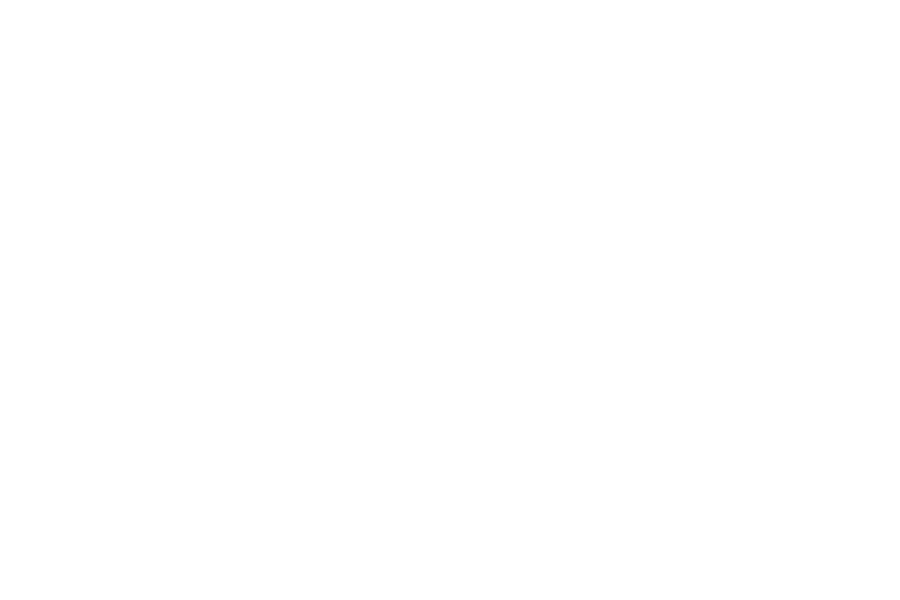

<IPython.core.display.Javascript object>


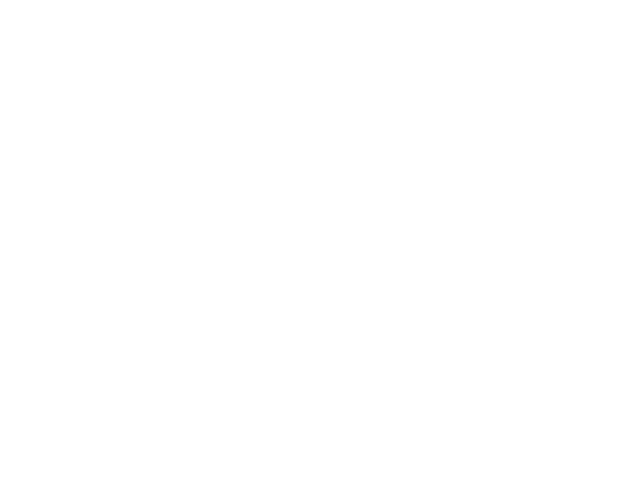

Text(0.5, 0, 'Time [s]')

In [4]:
#Part 1 (Moving in x)
#Making move in x
horizon_length = 1000
import discretizeDynamics
part1Solver = discretizeDynamics.solver(horizon_length = horizon_length)
z0 = np.array([0., 0.3, 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part1Solver.nominal_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAK8FtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EfVliIQAP//+92ifAptaQ3qA5JXFJdtPgf+rZ3B8j+kDAAADAAADAAADAAB1oWGAKYNX0WHAAAAD
AAmgAVAAowCUgKmhHu/ifulxAQcwg58Gg9IQ//ND6pvzvVm0S1gLeifirHZOZuMa+DWBSERwDJuK
Rls1wwiJr4cof7z2cZAmI629h/13RClUxSw2nWg78hfTSbAu/R33AELAxpF7tz+7C/Wc42llJd7/
jv5/5eyIvbVaeliyk24erZdh5JiZfSMmPlin8lZoaDeZVoIFfNLV0B+RvVg9N/oaI3qY3rh/eida
Al3Gi14ub56yDcIAk2CCtI4ygVRpEaiQyJpGS8sDimLBPq8YKec1+MfgMDjRhPBSoas+Aj8CjcvV
M2MKYUr9QTodafJePeP1etcGE2uUr2Y9LJYU1a6c5h9D/BrJuuk+dyypTVqWVFSMibVjKAC9MW6l
ECIMouTPcIcyHY5QCVik4VHbOSY5AjTyk1HCtCRAY15fjHMHfj9FucwFQAEEAAAEaVoMnzvoz8Ze
2jxHsdyww/lwIPhYZj9cr/sCzDGA1JXOpktMzUsr2rKk2ZDKOAW5ayX7+OPXXeNVyPAf6cl+QoDD
6XmjYBLS5p2thcV6nvSE56tcwW0qgnT7Bkr/3EgFlC2Gmcq9VVEMzSTnjDNi13TNYmkTjaMClYZr
pYzoHejY2u3pMNP/q6PSJQbiA8VzfdY30q2gf0DHsVXRKw3GSbiq4cgO8aktSKF+VlfPZG/sILjt
OIh9ZiKnl/GnfjHoSkWwXowqU/mhxJpQEaWO4yae6fLzQCXMPgFrEJei2O0/qmpK/bwYsXDOy5DT
UrVg3wZE4MT6NrF9EoPALtRWJDHX+RAj+NvWOtrsnat03AKyPTnXPi/sosNiSYANlrbpVybXsIpv
/JpfJTTRHlWrdTD4rZ1lBbg+F5HKec7CFUekAAADAAADAAADAAA0fdA2a/fgVRaLdqLmngzpQuNU
Kyt4EFhwwOk5Ie/w8MbGGse4umc/7XN7GMqcVJ/v8P4xXK0WnPq8a36oAR/JNEM4+kRapX4xj+b9
wB+V8lw1iWglB6eGSUXBS+3VDQl6FuRU7i3bvQyuRreAxfJ/moxU8W5TNbibbGUMrJrmvqkNWD/D
PjVjrKNAxfOzthHwRWJnCE9sCbx/8zMDwbmAgrb2zXh2/ZeFwGspKQ0X9SxGuJuUJfUoZHgTZu0N
Lt1KcVBiFPYtsVPLz27Tqw1udMx/rJ+7zRxrS2FsTEkA1RBJAbWyVX3/8TFH+4iVz0qmwyvkR82d
SOmf57XmV23YXvVCKOJeFgacBdsgG1/HlUYCAio/ydtV35WDodgdaeQwylimcOU3W+UX5+kAgAAA
AwAAAwAAAwAGbbXd6a+yRHErO7wfU6Kc8T7xf4EggohmIxcZh9ipgKDRY8mlCp/1t0oeox3pOM2d
Jzfl2GN6LNQeVC07mu4Ws5qHxHWG6a2q9mnEWv62by01WEgpBO6MM0A9sxIifTYKBfRZZS5kZOfH
KX8F8d+2K6jCJjbBSmugEFsk3oSDJLAfBW1LdivLHdboSh2brjTkfeZybT3TgWZAuGnIQoG5EAms
rzWUH3Hje+lq8QSjsiCHDP985VA0YyRpMTUVNzjFzBz7cN9k/eIGcJmVfuAydjKq7faICU+N+9Mz
T88k5KMdckfUhaeVEdf+kM9DAWpWg/M7KA577I8SSE/rauEU4veTtEp9NjIRG6AqZX8AIV1qqIW1
WWTaYXFJpAK3rn5ot9n+SYhpkZWY0TK4Za7uV3/RmdStDMqYq8T7v4vf8d0BB+8zglbajCdJLykc
caXqHxlTQl9DGf/0ebNMDqLLkCEc7JH2luIWVz3ekfe/eAAAAwAAAwBzjAAzZmvgL8Vreza71hg4
qy1IfzDB3daiPLaLSgWulihJBcf4VJkU0oVxhVy58GTbS1XvGeC3bvR6Eo40uvm4Rdn6E+97nzVu
1wdt6Ca+04DoYcgJ49io9MAIPFWiCpqPavtuocMl57l72IXDEtH0OFhC1nxCcgUaKepi/xmBCjXz
gy3mXBrZPDsEexg5d8oc6Wz5we2ty8MrPamK5mXQl6idb5VpyfIs0FASEau1s8/Wae6yjJD762hO
abX+WdPEN04zMRoP2pWFdSb8FX7gpW2bjg2tTSVtC7U0tPWdKitvbS79ipiBG29otVP7/ZamOUyg
t78Bgpppc6cZD9+9yZzoP54T7/5ZZXQo4M/WndUAn8cA0kSQw5ZAz20YDGCf57KCHF+2ind7XjUO
YIPpjr0NQ37YYOVClJeHkQCY8PSwtaz8OEfRDvkHcgNvSZfGwzdcJY7YJYFiDyUOVmpRfH8uSoAm
6Z4vAIDG51OP5bPOobMxPMEQFlA4LbkdbWElivSA3NdmvEOkCCJDRDJMzwEAvcFVYMNgDA0XCcn4
FKL6h9+T/7YoqYvNJgc4rAEnGFtcX1CqF/+ltCBiKxYuCZSLIC0ynnz5hwp0hcvhazJBn3q95mOt
OrfiKT9MrTn+sCYxCUBjOFKQ10yLN/5g4HGrjASjMp4gw1XaJxLRUfQ2xE/OJDcqI3OWEK34w7IK
BEIPhTi4zRNcAAADAi/Pb4ypOHZIvpNBIQrSGwD1yDhK3Q8CdKL3hIB/nYPZ76Emg+SxwGnZ8d7x
7cAQTEJtNcvEaugACK2zzrMjrOz8xCABsJfzBoDkZr0nHJ/ElcF06zAv0CzEmu0KP9O9TZdD2coH
sgCjm26zvFxRRiMm2v12lkhu7PN1u0P6Lim1DiB5N8bDa6yJer+F6glrc4CR+Yily1O6RUj/uo+0
N9uFSYVn7li29vHk7i1o+hF3qVi7IB0/ZpiP+R5en9b30uSa6X+hCBij6VqN84KvwsTGG1/H8ITI
3RDaEPsixqpZvNXAtW2ys

<IPython.core.display.Javascript object>


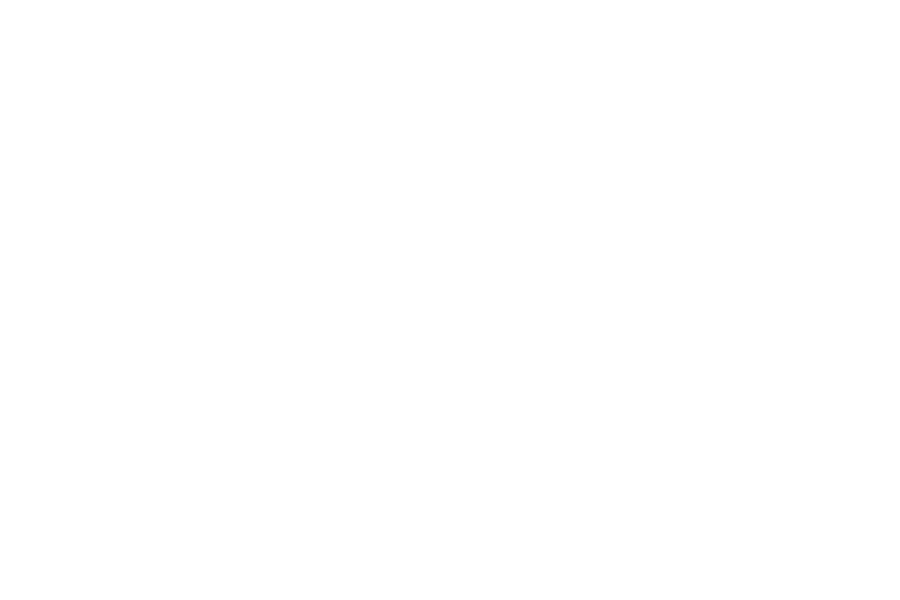

<IPython.core.display.Javascript object>


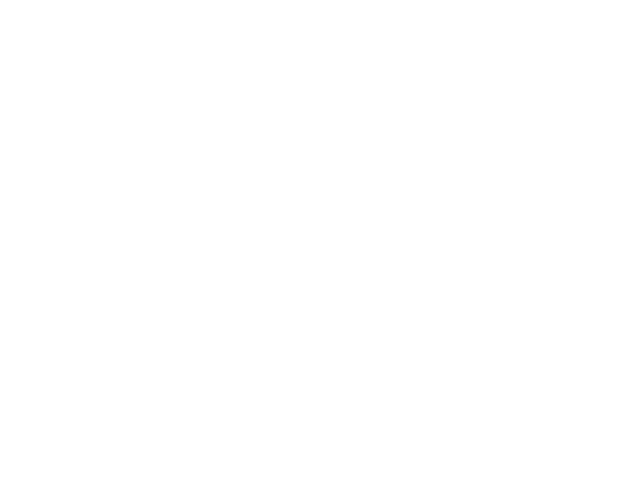

Text(0.5, 0, 'Time [s]')

In [5]:
#Part 1 (Keeping drone in vertical postion)
#Making drone hover at origin in a vertical positon(pi/2)
horizon_length = 1000
import discretizeDynamics
part1Solver = discretizeDynamics.solver(horizon_length = horizon_length)
z0 = np.array([0., 0., 0., 0., np.pi/2, 0.])
t, state, u = quadrotor.simulate(z0, part1Solver.nominal_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

## Part 2 - LQR to stay in place
Now that we have $u^*$ capable of keeping the robot at rest, we can design a simple controller that ensures that the robot stays in place even when pushed around by random disturbances (e.g. due to the wind). Our task here will be to design a LQR controller that keeps the robot at a predefined position. Since the dynamics is not linear, we need to compute a linear approximation of it.
1. Linearize the dynamics at an arbitrary operating point $z^*$, $u^*$ and write the linearized system dynamics using the variables $\bar{z}_n = z_n - z^*$ and $\bar{u}_n = u_n - u^*$.
2. Write a function ```get_linearization(z, u)``` that returns the matrices A and B given a state $z$ and a control $u$ (use the constants defined in the ``quadrotor.py`` module).
3. Using the linearized dynamics, we can design an infinite horizon LQR controller of the form, $\hat{u} = K \bar{z}$ to stabilize the resting point. Write the equations of the controller in the original coordinates $u$ as a function of $z$.
4. Design an infinite-horizon LQR controller that stabilizes the origin $z=0$ and test it using the simulator below.
5. Explain your intended design in the report, including the cost function and found control law. In particular, verify that it can handle perturbations by calling the ```simulate``` function with ```disturbance = True``` (when setting disturbance to ``True``, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state evolution and show the animation (include the plots in your report).

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAYtBtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Ep1liIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLinTkrRqis8WtrPmCEZAG09t
BnlUGDyrF7431X9Ggsrr4v6OxH3Opz8Upv6jIHjIzP5WqIZIDUCZJTtQl68zbgvt7J2ra/bwZpM6
paowcJtM5ZPE24z39rF9EoPALouyjTBUL7cdrRruf2amRzdb5SfnlyLpNJsUyMUXdvUxZRHKRZsI
nzk9CHf6mmhFzeMa8GeYkaWJcEqg2wO48jlPNGeCIpIkj77FEgAAAwAAAwAAAwAACnRUDZr9qtYv
E/CgEdPBnShcaoVlbvjrHnAdJyQ9/h4Y2MNJLgTeH/2ubsafAQmv/f4fxiuVoM5NHnHCOA54iXCH
kF23qB2RT/9mtKLPwDyxErginenOpAma7GsG6y6lk6cEIKAHUYC1dFOeeYX/OjO/h73WT8xDvoQi
bOpMhvbWf0/13uvhOPhy2RxvdAsmhD2hkt4/+ZmB4NzAOA0YZrzxLorC4DWUlgtWFaQAqClxr6lD
I8CbN2rG9WaoD6f344CRn5XzDeGwleLIOUnMlBF+0ccP9RkqY6i/aA5Vgbrmew/+kHLtlOHE842O
q1qkfNnUjpn+e18lCdEr9QypkDsxYGnAXbIBtDw5dGAgIqP8n7PCr0NCzlqmsbnY3z7B3JnDo6kq
ei3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIt7rH1nPHKLkLbhvTk9IT6FH4SCC
iGYjFxmHR6WAoNFjyaUKodxvESbn3hE4TZ0nN+XYOql3Yz4xLmu4Ws5YZk03VtUeWZ9sFOl8eD1b
ZTEn5rZHecMNohlkivHAATWdTw3DolGULj/hmh37YrqMImNsGUtimQWyTeiDxgPgrbnRVNJvd1NL
OEP0jZkGeZybTRyjC31/9gvHJm0M8eTsemVvPT1bdz5bN3wDJfIB8r9lJEe1zyGpFqNfmCIewsp6
9lJc5hd2k7NZoyZMUncBomQaPr92h1zHadqjwVF197bssfcgxvLfFnAuccafB9tGiDrGNDBcK7yt
A3EZHH10pDl6mNvx/dtP2p4cK9AVb/Kh6nL5kWB8wetr+b+v8kIxYZ6x1ioMVviWKcsCgGZUxV4n
3fxe/47oCEV5nBK21GE6SXo1Y7RBjpDdooLTFzroNUe23FU7+/5SRQvvjaL2oGDNmNDkbpbfquD9
6QcAAB1jn8jtX58gAAJK33DUCZtNACxV8lqEK+fjtfTM11dMVI/AkEQd64Iy5i/Fji+BMAWW+19o
HyddUvXK10gpet8jm+8Dha8wb8kq22Oe4RVv9/XEzbmlAnr7nKBZ6JeD3JUxBUeWHzlwFxHxivis
Yis8pqeAAd7EAdLE8caySqfNFM1Kj4B1Cw0Y2mi6tbo7jCJHtVJRbHosnDY24xZJOewZT67xxaVA
5F4MnYCbz1xi8nRCRA7MpyO+3hf1ak66PoQMTpIQ3TWzz9Zp7rKMmSX+kb7Vw+TETHX5KunEcYkI
0H7UrCuo+PihMwC/j5Vy/aHuArpWwtGKpTtZ0p6v/dgynTBiBG2mMUw/RcbX6ZNW9+AwU00ujrQT
Yz/eP8r6RvGsPki14Rws6izqoZNiFJRcSd+Ts+SOjs/T3XyshR6vWdBRiDPhLH1MG+p34vP2pBdb
iM5KpwncxdeB94a0pKHukZTZN4ogbewovX0k6sSMlF7ae0nAeFFP6mjLVQ0P04NEcMHN/D4hYMbP
GsZrFwDzXI5CJ4i/83nCyyEsxtWoHGysZ6EpPrs54fNrl9HsD2uOghLHvqdK+/NgDV5aVMFXjRDN
U8KR7zv/ySyNNvZLExDu+yhW/TMuZ3bltCrEasK3f2s62NVQBxf6pYNwrpDDcMzjgCPjrhBthLsu
7bFWD23DxMBv3pGpqXPmimoOTIv72cS4esxk+yGyK59cB579gMmfAfE/KsBk8McO9FO36WdmbTRQ
57kHXhn4GIpcqnO1ENm2wqLg9/DxVSj0ODW9mi74n0lVSy1BCUnlbEFBHyTqzA8QYKP/QXxt35Ve
1QHa/ncx+bQVenA+r69l6z94yfYU5//kt/+i08HP7QHy5/Choo/XHWyacD90QktotvaeqyITxahu
XTuJWtv4m0kACCnWxHZp8/pSksINU5M4RNr8ojUmzqZtFkrs0Uh16K+3YbD6viwsTR9Zgw7gASUU
wK2q5RaU2nD+gDmDHoAAA

<IPython.core.display.Javascript object>


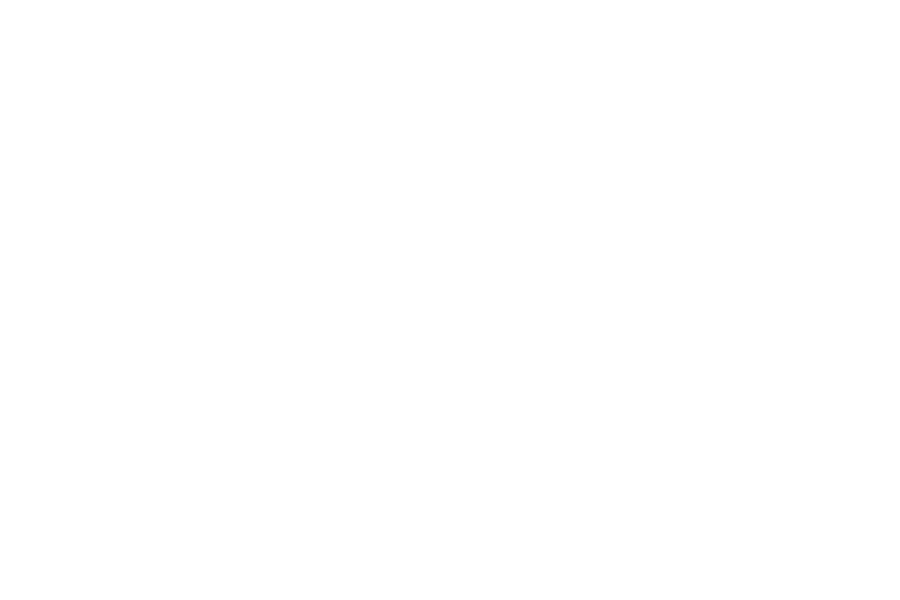

<IPython.core.display.Javascript object>


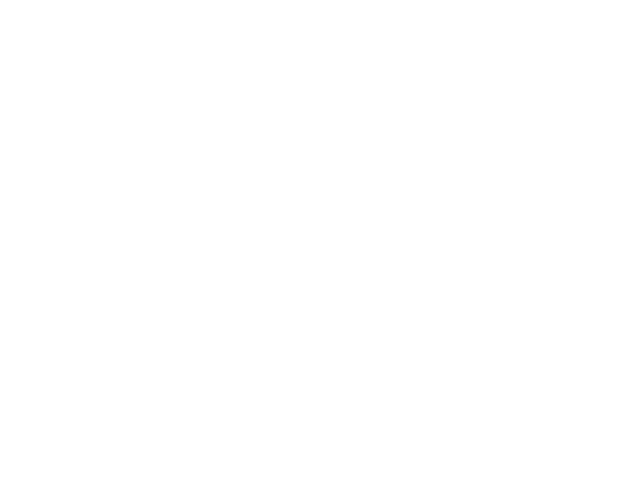

Text(0.5, 0, 'Time [s]')

In [6]:
#Part 2 (LQR to stay in place)
#Making drone stay at orgin even during disturbances
horizon_length = 1000
import LQR
part2Solver = LQR.solver2(horizon_length = horizon_length)
z0 = np.array([0., 0., 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part2Solver.stay_still_controller, horizon_length, disturbance = True)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

## Part 3 - following a trajectory using linearized dynamics
Now we want to follow a given trajectory leveraging a linearized version of the dynamics to design LQ controllers.
1. Assume that we want to follow a circle of radius 1 centered at (0,0) while keeping an orientation $\theta=0$, how does the linearization of the dynamics change along the desired trajectory? Why?
2. Design a tracking controller (using an LQ design with linear approximations) to follow this desired trajectory. Explain your design in the report. 
3. Test the tracking controller with the simulation (with and without the perturbations) and verify that you can indeed track the (x,y) trajectory very well. Are you able to also track $\theta$? (Explain) 
4. Analyze your results (including plots of the states, controls, etc). What benefits and issues do you see with this approach?
5. Is it possible to do the same thing while keeping a desired orientation of $\theta = \frac{\pi}{4}$ ? What might influence the results in this case?

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAZgNtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
E2dliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwAAAwAGIxI3/ofxeM38AAAD
AAC3ABhQDCAKqAwqKe7+J+6nEAthk3z4NEVsiXDWZ2SIPprNolrAW9coFIQGQQogk1usCkk7gKLc
UjLZrhejXtCUcPUjlbYcy+yu9JWQjvWkunAVPdeDvyF9tLxVjIpotabFMJTVobn7sNL/ZmIE+0nq
+5i//d/tW8x5j/WWUm3D1th34Lb/lqRonpS6jyVmhmedEfUwaAQY0NNeI9N/r8O7WKv1d/gCdaAl
3Gi81o3z2y10tRWcIK0jjKBVUuThZ+QsHL0juuKYsYerxwt5gPJY/10Ju9cBgsZD+IYpXX8y4aU4
GzaP2PrB4NuOhJtn+9mFNWxeFMP7FK4BWsfJQXfJEjhPgMMovYZQhGmpmRnItDNjjPOpOswlA7i1
FScQFRrejmrIi8OOhTAscBGZQxLIoVdyVxGaX0C0gyTiqrr63K+uEhJ+qks1tv3wSCRyHbkjhaDH
UAaOg0i6B/Gp7ihd1EJvSGLAP1z4GLBCDMdHDw4PU7GyRgXHegTUzETVOhdzMU/O7baIvYfpFkAA
AAMAEEH8N1eQAAxiuJdDCAAnhNi3KcGPQLiPR5GJtG5EVhbJEuC2fw22L0tcmQHOqE2DkFOb5DkM
oECkLUsr2rFzIFjP8Aty1kv38cfUQb4VhdJje6g0lvFVwDzupV8YyadrYTbQ0V6QnPVrmC2k3ZHc
EGSv/cSAV3S2OiUTsbXt4aSXA9OBbYtd0zWJpEgRZGpWGa6WM6B3o2LsJv5A7do8AtLa06LitP8X
gGtXRGUrDaaaVgEUgKkKkuD4FacZ+p/YT20GeVQZSCZoUPYSx+ge+Gh2R/bajj+jX2FQ2BXIzfpU
AU5BEfTQwURHD6UeQd2eM6KvFwA/N2cQIAHBs+/lxcjsgkU/KT6KH3StY7fGeC4uWlb2c//37LWX
8w/RMDBuiIFoMToDY7PYHYzaN9Cnttc6oeJ9//+vqSMEPSNB8o0sQZQ3IQrAO6Nn9826vhkTDsI6
iTYSO9j6j0iKwh1P3w/MnoTrtJ2/nx84ooinmPPYv7mMFjgbR7k7gE6hF8Id3G0wkPAAIdttr+0A
jYLNtGvBQYAAAmvQBw9AHP2Zt5ue9Oam7OW3Tmu5p4M6ULjVCsrdXwwmjkvBhHr/DwxsbS1WlYqc
/7XNvc1xOKk/3+H8YrmxM6qBeccI4DniJcIeQXJ3DmCvxjH837gD8r5LaDVI7U6yDdfjHeGJCIUL
0iucE9r9/wdLEcsb4Xz2n6/qprO0CWxke6Ow0BoO2hT9wVTf6J9fQP/nWUaIKYzFlpLz8BGhDp5b
w8f/MzA8G5gYckbTNespJI5yA6mvoQhl2c9pHn52XOlDI8CbN2urp0eX2hRCrQakGFPmG8NhK8WQ
MGD8WTn7RuvbJJazKXi9BcBK5f1h1O5WfS5+/2voFHzESA9owYA2B8or/Hf/E2EyY+0P9004Dp4T
BK9+MklkNfSa4PAY70sqrdALzDVPhAVhRrXfh8sBHgBg8zQWNc/eRIk7qE400do+CXAtyHwSaQAp
qvXK469gPO3+EVVayJRRUeaB1ub6LHCiHWAABF4n+mZC8+9F2QYAAA5Kp3UXSH+ClTQADccALjzz
9Hc7fiM+lYdwaB3INRiAO8jJcX/xHPcUjhrdymUCOVRyXamhiZwRB5waXvnAnnlgtLYxHYg8FUqV
oLi3IB9m88reHbGwgLGdmR6cZkWlessa9VrSYXec+n+MWn2/xbxwATD7o3DrVGURZ74jXYeVHTGE
TG2CNzFsr4IwMEPoCcCaEre915PITut0JQ7N1xHvtO6oRWbTgXZB80njRhF7GRut2wV8O8HTS6Ap
Vp+OyIIcNCXxEwtwui25hRq+krxi5g59uG+yfvB6FXq7Y60a2jy5jtNR7jLBYArJGCNUMrHQWUre
SjTEQfe3xMZTN42Sq6L8/eZcmOwn1UkK9xS7GqnnVs8Gi8Et+XygJtZZJqIWs64n/55nKxkud8d4
6IQm803leOiFarmiPLo+kC1q7oVahv+JW0KZPfR79dbanyGJCrWjWnpGYChs2lXrWheB+YMMqSCU
a2xBWydXyJOD/x7CG57NVvmBOm4qqey4pl/wH2nfGLEE6kfcIAZkVVAWSykNvw9heGcOQcRIqVg3
O95iNuvVXi1PuYwLPYYu3gDkGpgaeCdpFvfO/ldatO6sNjfFAAADAhbikY4J0AhvX6xFEIRgKi5W
A3WBbS3vxucLD16/5/S30pu9W+rB/kN7ARCYnJ6q6gmG7mtxLE2YvVRBgKtvqKYrkAebv6Z8+PKW
bA+FWWwcSO1yDe1x7niMcTeNaifgu2XJfr47vobwBX7mFVdaSJ2V0SiVFrFOJIHtQ2kJmfufaLHg
rO89nG7jIMBfpWPWQ6bk5HI4cyvu23npWxFt0nGvA+f8BOLFqQsGMOPgkweqMFyaLUNliGv6Y8Yq
lO1nSn9pyiunV63Aw5Zo8xCY6ot69UljADMBgpppcrajMbvjiSwI+C7oFgtOeP1GdUc9FZRGDMPq
/bA/+Y2VGIMdbS2ihAFjq970W4jI59ssEn+QG57ds47gkzqv49VI8L7bkp5QI+zOIvRVXRBm/3lY
pviOAmVJMa40+avFj42JVk0O4bo6wRFuqYOAZj2/ybkDcxH8TvK2dXpZ0iuVN+VAMP0snlsZhAzl
AcqrxpLbrjz91X7MHgCLjCA5EYv84c8U1Tm7LOfleuxbFsTU15mdiKL5uFI0y4rSLpq4pcciteth
3Z8s8tI9DJckHHD8I1PKvzSEzdLsTr/J56WGx5CqRz0oIKLyuoFnsThIm3YTYO5ebHG6fyjIweEK
uYMx8J/7LhcoEjtmgsO8v

<IPython.core.display.Javascript object>


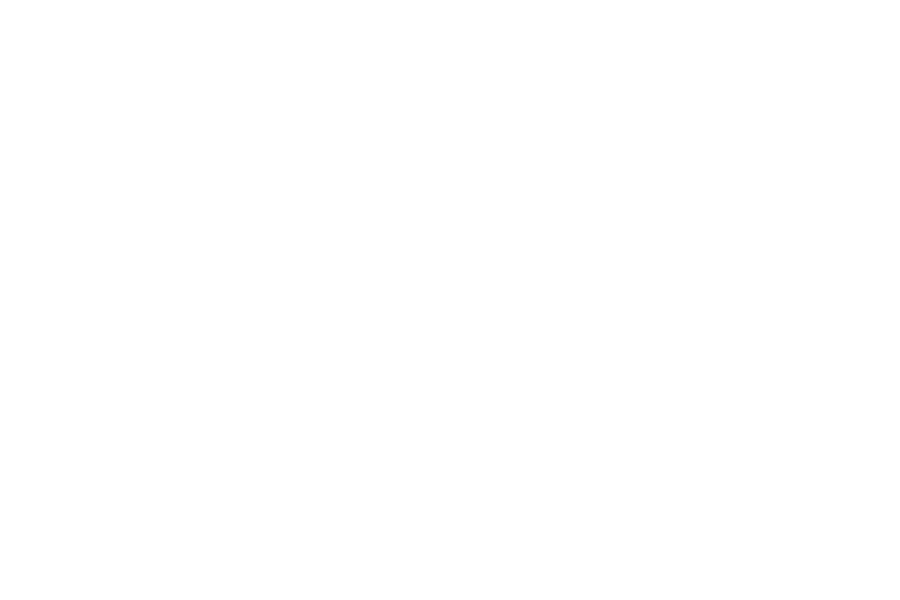

<IPython.core.display.Javascript object>


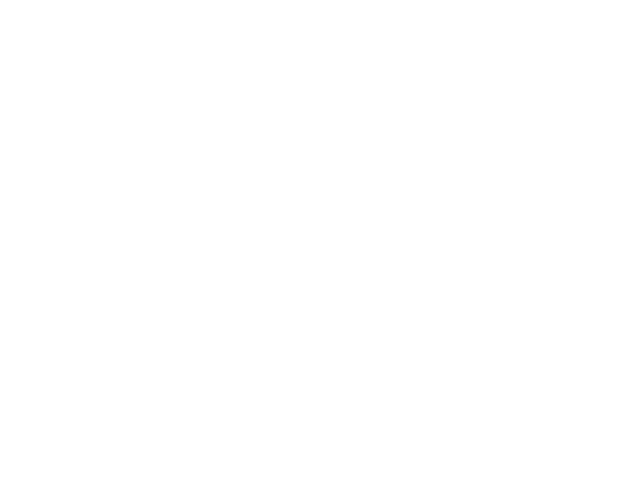

Text(0.5, 0, 'Time [s]')

In [7]:
#Part 3 (LQR trajectory to move in a circle)
#Making drone move in a circle without disturbances
horizon_length = 1000
import trajectoryGeneration
part3Solver = trajectoryGeneration.solver3(horizon_length = horizon_length)
z0 = np.array([1., 0., 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part3Solver.move_circular_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAcbdtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
E1JliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cPQJxcwS2oyQuZAYLGQ/nQ5t59XDvIf
WMHf+69O/JG3mzFIf72oU1Zl4Uw/sUrgFay8lBeMkRPc+Ay+i9hlCEaamZGdi7NHPE528LCoSSqZ
YMEiRdefkU8ykfntK0dKx4D+yQ0sipBpPbP/K0f8sSV6s4LjIfr7MjAkKqTi2ZUXXI7uh1GkPK4M
Kfxz0rYocL2olX2RVm3yR4IB70m7AD/a9qYXrsiG/n7G6pUpccp8wnsfbIw6VHgAZAOMaGPCaAYK
i40pTa9bLE3Q7UAnh5SCJ44D8UQsZtLo9nVCbByCnN24nYKBYPr+/URVarVr4h/gFuWsl+/jj6ip
vi0XID/TkvyEQZQCBCjqPCZECGHJtnaeVITnq1zBbSbvacvjJX/uJAK75bHRKJ6nb26NJQ7OqGZs
Wu6ZrE0iQItgUrDNdLGdA70bF3DwxBhA8eWNEdwPFxbygf0DHsVXRKw2nmlYBFICntxLe+BWdukn
AG09tBnlUGUoiuSF6D/vwLhdfaab9R+ddE8VNT/UZA8ZGZ/K2zQ3R+wl0JO2LLqg3KI7OqRRzcvj
jNmREgtn+uv2AlLFl0YaeluUnY4zvDnt1FBd//+0HfG5YOKTcl9zQNEg3hk2OrGYh0EwCdo0CufU
O/wN//X33gzD0jMp+vcCJISRR1vSQfJj3zbq+GRMUDM4GFSoz/9hCYRW3927PFbFowhKPxiK8ZDU
13vjqni5iI+9i0e48jlNn++cueRXu0ywABDI6AOc8dU/mCNgAAA16c6UCWWNQABRYADHcw72Q3yI
rWNNsYY413NPBnShcaoVlbsTo40cl4MI9f4eGNjj1HwE0zn/a6h/suJxUn+/w/jFc7EbVQLzjhHA
c8RLhDyC5g1HPVWpGuSjWU/MwC1B3zrA6RYPZ5NVN2I6FC9JFd7QbT6Qs3Z+Me9KW5f79HDqcZlm
bi/YrwFn0PZtg+jsHwzgwr2eV9vq9lzrXtSCMA8jFwh2Pt4eP/mZgeDcwOMJapVvKGMTwuAirZlv
3Ts57SP/lUH1KGR4E2btdZTec5QSPfjoxhg6y89u06sNboHBUYIbado3Xth4ArCvHOP/+PywgvjB
PpY0/3K9nYf4H1mXif7gNyObpVP92kd+9M0P9Y+yr8diU9BIDQVkNe9PE4L48k9HRmMm5Z0qGKoQ
WvGLtL/kz8GDzNjsrI2jiRNohTjTR2j4JcC3R0hUGgCsmGUTjf3h4fQqjB3lIjzFR5oHZuZRpnEz
zwCXnObcAKCDRjd/3NBJbvKqI4YAAUBG/GuQGaLSUgOqnNxtAG/SaHMOXMT67MbBhw3Fp+KoEzc3
zGm3SODMBcSjYDCIIuNz92Wmqd0/yM2FQGHL7pgEAsFcQHvKXvnQ3tp7AvYxHQ46SnfPvQu01uVm
88reHbGwT5vnaJraeyLSvWWNeq1pMIRvlR4/39E0gx6bBQLnULKYEjKpDuteUO/bFdRhExtgizTU
SC2JCEZjMylXBW3yRtwyb3dTSzhD9IadBnmcmxcrO5NvP2C71XQ8SkkboiSFovT1bdz5bN3wDFa3
uyrUCCciTtIthMDbQIk6rL/o4XEFCywclGF3hxU7mZXwsj7X9/nRy1XRbXZcCpSoeiBp5OAJpi/m
QJWhba3gZPJWAl/1g2GvMXHJAypudmzT5KOQ9ylxz1tvN6K+YnaIz7RATTo9DcXZ3cjkwhh7vUf8
dlSnN87KCj7FTHIchsdnHWG6x9Hv1cOKGnjuODXNEdIzAxNZA4t+J8JvzBhs+M9hCW0YD7O/lInC
NrkGuezU1IJc53hO58AIZeQy3Vdvs3/KMl3CAGZFVQEVkpDb8PYXhnDhz7Oe7Jprh+j+L3iwz1k9
3/KJUMUfQ60gMBJDKgfSd6rSqxCDqwDXxl9Cb6wAAeDQNCK+lw+1ZCBEvMqrk7fGWTm1RbLtSDDA
Dd3k8s6cbLBm7dfDW14EfVYv6MHD12RsCSXCQR7J0MehWOkbNIC7+WCfRdrolsOgFTE4HoKmGWrv
6Z8+PKWbA+FZNt1N7f7txOrMSCrv8p3EVfk/sWvN0HCqiDpPcu5iKN/Ng6UHnpcOI3UBzI5jggOy
fWMxki2EYc2su4dANznBr8rRuBGe08+Dlxz7TjoCmEEbEbH7OI7zMxGg/alYV1KHj3WdmIf4Cl1e
VFbQu1NLT1nSoztO0jnq86gYctkXy7CM4ySWMAMwGCmmlyiDyp7wGPQTPgu6BYLTnj9JXVGCBoWD
zc030SPBXarBRegsRuCtwCLbm/u6BQ6SClFTmrDmZO09mUaAi65k//j1dF3iuECPZGpb+fPiiNP7
3vZQV0mwX1triW4bKNIRL/yVGd2cXa4n6kQNamK/TD117u1hF0kY6cO/uJ0bxs1LsWQ7Ujz6nbYb
h3ehO3EPp4QEGFtLJN+nZlfaM19xhAciWYm/SW0+4Nq7MUpkDhbFsTGYG+vJUi1n1H7UCKsnhFzh
SPDXvh+ryU8e8hlO7Eueaz7TH564fCcYDpwizx29ulhseTWt7WMCCgVMCHZ7KIQFM6i20z15sYFH
XdEWFzETzZ8RB72227JVv

<IPython.core.display.Javascript object>


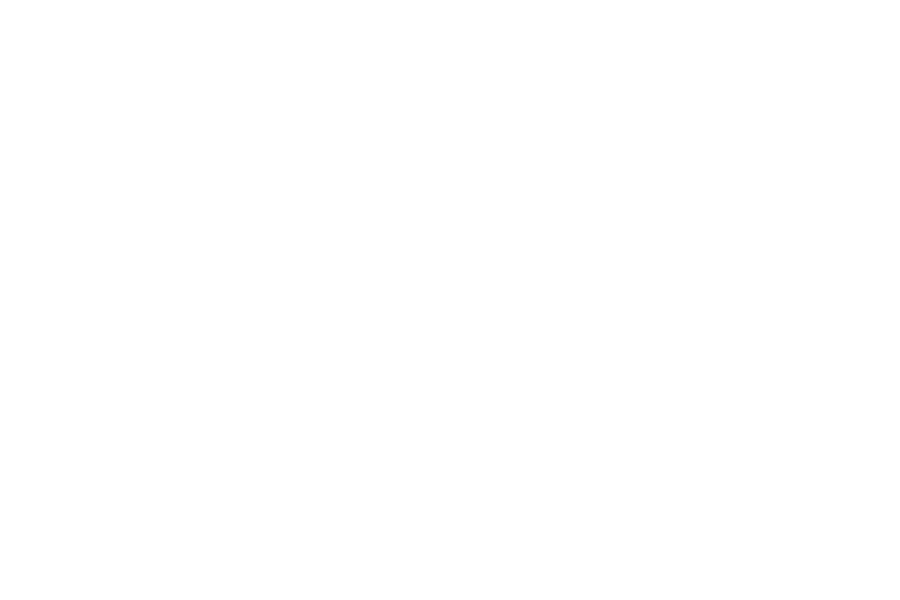

<IPython.core.display.Javascript object>


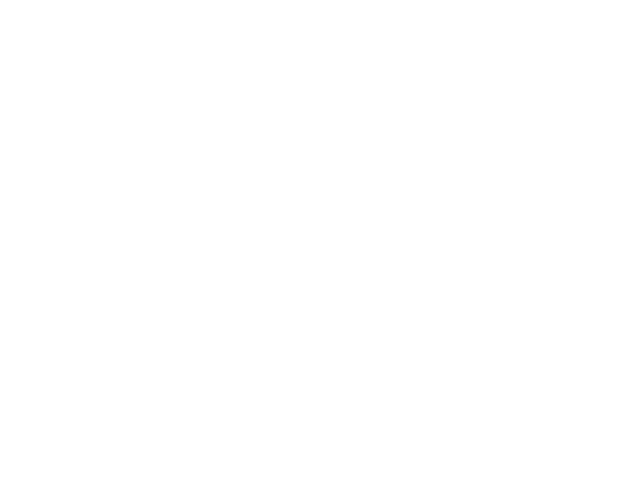

Text(0.5, 0, 'Time [s]')

In [8]:
#Part 3 (LQR trajectory to move in a circle)
#Making drone move in a circle during disturbances also
horizon_length = 1000
import trajectoryGeneration
part3Solver = trajectoryGeneration.solver3(horizon_length = horizon_length)
z0 = np.array([1., 0., 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part3Solver.move_circular_controller, horizon_length, disturbance = True)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAdyJtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
HQhliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78EfyJbnR
AKYWKMobqndaVlkE6AtzpeHonC9GT4BVMi/OacZ1oT+9hVmulCoTm1aUDXAvOWwJVeFoyHDIqUgd
hcLMjnuEdcORUkAk3Xz/xcvS4V3pz9EV9s4Xld6un26/b9tWOQAeRd/f6RAAAAMAAAMAyh/rl6PI
+SdU7yokDOJyww/lwIPTXg+lvHHHtpfxUetiFUyWmZqWV7Vj9z9wT/ALctZL9/HHrp2ErRcgP9OS
/IT56XLfBsAlpc07Wwr00XhByc9WuYLaUwATT8vv7QrrzEeloCb0rDZ+tXsxzoxjcKm43oh9GEg3
UDCs56Jsw8DvRrr/L19AMZ/2pLXUh26CeyOFpqPO+zFpeAa1dEZSsNCBcU6claNUVni1tZ8wQjIA
2ntoM8qgweVYvfG+q/o0FldfF/R2I+51OfilN/UZA8ZGZ/K1RDJAagTJKdqEvXmbcF9vZO1bX7eD
NJnVLVGDhNpnLJ4m3Ge/tYvolB4BdF2VLcF1+8SClLK0Ln2UKOdFbgj5QOmxjk1wt5ErVa2uUizY
RPnJ6D8/2sg5KaaHgoHcxJYsS3zE3Fg+F5HKeaYIURJysP3eCLAAAAMAAAMAAAMAAEjOLYTX7Vaz
uKuTzeieDOlC41QrK3fIWPOA6Tkh7/DwxsYal7i6Zz/tc3pQypxUn+/w/jFcrRRyaPOOEcBzxEuE
PILtneDsin/7NaUWfgHliJXBFO9Nje4JkDGsG6y6lk7GEIKAHUYC1dFOeeX3+5zjrxujeqgMHVvf
AA2pfMxtrP6f673Xwmb4ntkeb3SJc4Q9oZLeP/mZgeDcwDSLQsi8816KwuA1lJXrNhWkAKgrca+p
QyPAmzdqw3cAlw+n9+N9YxeV8w3hsJXiyDdZJbPxftHHD/JZKmOov2gOVYGnKHuD/yMYNK6wropB
Jxo8N/LNaXYUIQw30kTolfqGVMgdmLA04C7ZANoe/LowEBFR/lXZwH5/fV+WoEQGtjfPsHcmeGbr
FcaMOgD7J0RFwAAEcKU5pAAorUhWAASwhXAoCAhFvdY+m6I5RchbcN6cnpCfQuvCQQUQzEYuMw5R
SwFBoseTShVDvt4iTc+8UnCbOk5vy7B1Uu7GgWJc13C1nLDMmm6sqjyzcwjfgeKXxa/cxp0dWEGo
LAPbLYSx3pYoiqm5hg6JRlC4f4Zod+2K6jCJjbBlLYpkFsk3og8YD4K250VTSb3dTSzhD9I2pBnm
cm00cowt9f/YLxzZtDPHk7HplfBEhviH+Kk1EqP9L0AK/ZSRHtc8pqRajX5giHsLKey8tUsy8i1u
80Hyypik7gNEyDR9fu0OuY7TtUeCouvvbdlj7kGN5b4s4FzjjT4Pto0QdYxoYLhXeVoG4jI4+ulI
cvUxt+P7tp+1PDhXoCrf5RhjRRAA8BrB62v5v6/yTpU0OZWtAIIftpYpzqIV3GUQwQkEBj0fzbQI
RXmcErbUYTpJejXPmZ4aC7TNIJPRRRnjie86T6T9Kcehf2APZBLNXUR3+JAUa3pp+K6cQ+wAABS0
4EAAACYs9uEADfrYofa0zN3So5JIecwRKizfxCQxTlm0VVKN83/rnD2y54SPj2ckyHymL//2LrCs
AmMhon1ZpgwT/957S6vD6Ia4MZf/mxwWa8U/8I5s/ovx/tGyCkSX19FspA95x5SKMzUlimd6iEji
7zkea5sYKQPO/ropyRLL5oXnVEq8jES74mx7OwfXdyOwMXX8Fy1D2W6UzQgGL7pz537cwhFcebPi
d3dtXPvhS9TEVAc5nNad9aqjVeH1Zh/l5SLakUs6z03ARDY7JibfgfHINv+HdOi97ilomc65cHVH
yU/q8ZSChjLN95/7FSvp7NdNa/i96ssctWaDRScPsJOhsJA3Hl4Bcj7SiNCXKqroef0foHrKc3Id
VgWVEnI9KsD6lJStfirRBXpAmV3AHarwbAT8+lOmZ7DaNfuDdVV8nxwCQkZ4xd5foePPu48KcE3W
CoRjR+qCv9srVSizgTlcNXBl+50QmagEh/q7Hor/8KxMqZ/9fSHUXAuGXmxf+RgMdCsFnIoiBId+
yYfFMhOD1BBUw1T8l78yn0KNUEjsO6BLARt0wWKzk6nZQLNnObLmd6XIkiaF/B4cpdaSC1EL3yTO
nKsqI50oDtEvTE0aWz7fbJBbLihlcxw7//ljqPp4bjS7gLhcyv6Yw5Lf9G9d7g/sz6Xc7+PxdVkl
N7rmU5DTnE85rra3mikxKAYizN+HFwq3xMWoODsDRjDUW2qBJsdR1bAEuSl0NJpC7kytsf9BPeiO
u/+iKCQ8ml+7P/WkAFdUjeNHAWZm9/QRdwfSCI0tTbmpWKDTkzYyXqmP9Df/qKwgieRODsWenCPG
n4WoVMh1v1x7ydxzwAVHrglnQHmieudJCddIpYLJuvXs9TSMQAjpk9tJDIGOSyBxspcfw2eiNgBl
NTln61fzYE16/8pTcN3Av4dJMTF2CyUbNBTpruyokxfOZMM11MC5SQjIvQJ0PnDd3/HKP7Qxb1Ep
q65GRFaMhYyivX9RsH/st

<IPython.core.display.Javascript object>


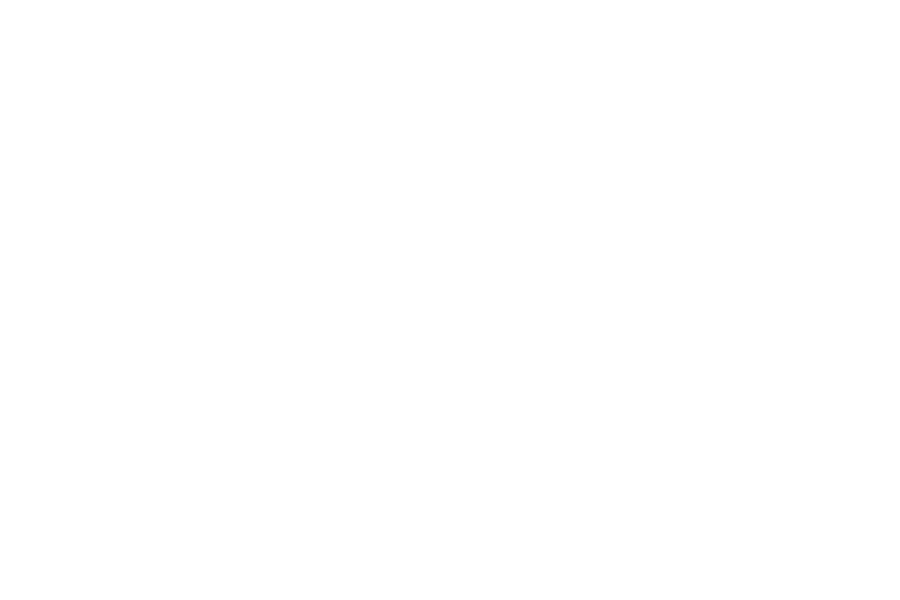

<IPython.core.display.Javascript object>


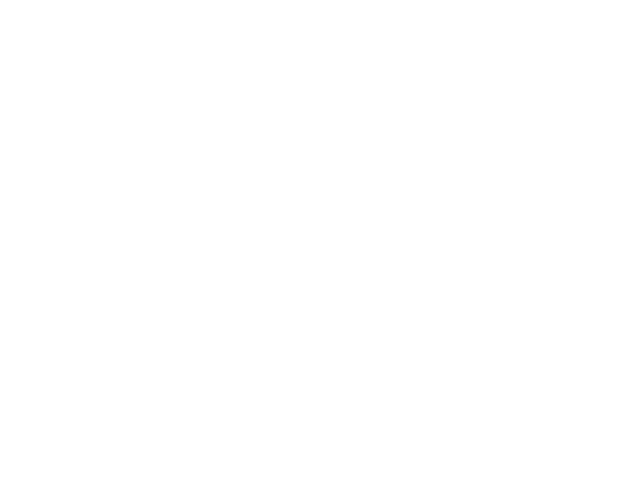

Text(0.5, 0, 'Time [s]')

In [9]:
#Part 3 (LQR trajectory to move in a circle at pi/4)
#Making drone move in a circle at pi/4
horizon_length = 1000
import trajectoryGeneration
part3Solver = trajectoryGeneration.solver3(horizon_length = horizon_length)
z0 = np.array([1., 0., 0., 0., np.pi / 4, 0.])
t, state, u = quadrotor.simulate(z0, part3Solver.move_circular_tilted_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

## Part 4 - iterative LQR
Now we would like to do more complicated motions with the robot, like a flip. In this case, we do not have a prescribed trajectory but we would like to compute a locally optimal trajectory while we optimize the controller. We will use the *iterative LQR* algorithm to solve this problem.
### Task 1 - reaching a vertical orientation
In the first task, we want the robot to reach a vertical orientation $\theta = \frac{\pi}{2}$ at the location $x=3$ and $y=3$ at time $t=5$ starting from $z_0=0$. During the rest of the motion, the robot should try and stay close to the origin. It should also try to keep its control $u$ close to the control needed to keep the robot at rest. We want to make sure the robot reaches the origin $z=0$ at the end of the movement. 
1. Find a time-varying cost function that promotes such a behavior (use only quadratic/linear terms for simplicity). Assume $T=10$ seconds.
2. Write a function ```compute_cost(z,u, horizon_length)``` that returns the cost of a trajectory z with control trajectory u (using the cost function you wrote in question 1).
3. Compute the quadratic approximation of your cost function along an arbitrary trajectory of states $z_n$ with control trajectory $u_n$ (this is not just your cost function!)
4. Write a function ```get_quadratic_approximation_cost(z, u, horizon_length)``` that returns the quadratic approximation (Hessian matrices and Jacobians) of the cost function when approximated along the trajectory z with control trajectory u.
5. Write the iLQR algorithm that solves the problem using the functions written above. DO NOT FORGET the line search step at each iteration. For the line search, start with $\alpha = 1.$ and decrease it by half when the cost does not improve (you can stop when $\alpha < 0.01$).
6. Test the algorithm using as initial guess $u$ such that the robot is at rest (using the results of Part 1.2). Analyze your results (probably you will need to "tune" your cost function), plot the initial and final state and control trajectories, show the animation. Use the simulation without perturbations for simplicity. 
7. What benefits and issues do you see with this approach?
### Task 2 - doing a full flip
In the second task, we want the robot to do a full flip, trying to reach the upside-down state $x=1.5$, $y=3$ and $\theta = \pi$ at $t=5$ and upright state $x=3$, $y=0$ and $\theta = 2\pi$ at $T=10$.
8. Use iLQR (and a new cost function) to get the quadrotor to perform the task. Analyze your results. 
9. What benefits and issues do you see with this approach? Could you run the resulting controller on a real robot?

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAfa9tZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EpNliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLinTkrRqis8WtrPmCEZAG09t
BnlUGDyrF7431X9Ggsrr4v6OxH3Opz8Upv6jIHjIzP5WqIZIDUCZJTtQl68zbgvt7J2ra/bwZpM6
paowcJtM5ZPE24z39rF9EoPALouyjTBUL7cdrRruf2amRzdb5SfnlyLpNJsUyMUXdvUxZRHKRZsI
nzk9CHf6mmhFzeMa8GeYkaWJcEqg2wO48jlPNGeCIpIkj77FEgAAAwAAAwAAAwAACnRUDZr9qtYv
E/CgEdPBnShcaoVlbvjrHnAdJyQ9/h4Y2MNJLgTeH/2ubsafAQmv/f4fxiuVoM5NHnHCOA54iXCH
kF23qB2RT/9mtKLPwDyxErginenOpAma7GsG6y6lk6cEIKAHUYC1dFOeeYX/OjO/h73WT8xDvoQi
bOpMhvbWf0/13uvhOPhy2RxvdAsmhD2hkt4/+ZmB4NzAOA0YZrzxLorC4DWUlgtWFaQAqClxr6lD
I8CbN2rG9WaoD6f344CRn5XzDeGwleLIOUnMlBF+0ccP9RkqY6i/aA5Vgbrmew/+kHLtlOHE842O
q1qkfNnUjpn+e18lCdEr9QypkDsxYGnAXbIBtDw5dGAgIqP8n7PCr0NCzlqmsbnY3z7B3JnDo6kq
ei3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIt7rH1nPHKLkLbhvTk9IT6FH4SCC
iGYjFxmHR6WAoNFjyaUKodxvESbn3hE4TZ0nN+XYOql3Yz4xLmu4Ws5YZk03VtUeWZ9sFOl8eD1b
ZTEn5rZHecMNohlkivHAATWdTw3DolGULj/hmh37YrqMImNsGUtimQWyTeiDxgPgrbnRVNJvd1NL
OEP0jZkGeZybTRyjC31/9gvHJm0M8eTsemVvPT1bdz5bN3wDJfIB8r9lJEe1zyGpFqNfmCIewsp6
9lJc5hd2k7NZoyZMUncBomQaPr92h1zHadqjwVF197bssfcgxvLfFnAuccafB9tGiDrGNDBcK7yt
A3EZHH10pDl6mNvx/dtP2p4cK9AVb/Kh6nL5kWB8wetr+b+v8kIxYZ6x1ioMVviWKcsCgGZUxV4n
3fxe/47oCEV5nBK21GE6SXo1Y7RBjpDdooLTFzroNUe23FUb++JSTSqzR+bDqjvhmUlh0Ny1WLvl
CQykQABVLz1Zs78zgAAFJr6qe1o2RYzQGn5DoyTK93kOE4G1HcVI3hkEQd64Iy5i/Fji+BMAWW+1
9oHydXxPXK10gl7V8jm+8Dha8wb8ja02Oe3ucAqGI6eoEcnJycI67M6CRF9Z7vpTN+x/zirwXf8b
hfkEienkKSvIw9V98+PKWbA+FWFkk5w6bOE6sxIKu/yn/1//jMfvS+5bP9Q1toW/uYcWlQM8vxLU
0negLMIIuAi5md51kaeCD/m1l3DoBt+aJDGR6WeLEv/ikj1ie/yeWauHyYiY6/JV1IUBByNB+1Kw
rqPj4oTMAv4+Vcv2e7gOSVsLRiqU7WdKer/3YRqUwYgRtph1MP0XG2WkQWsc/PhNNLoDzOOcG75v
YXVcLOos6qGTcjKvvHLcNQPxuHseuWVVuyFHq9ZzwIzOdhY+pgxk0QnzvWZG1uCV8qrovZbBWJ7a
m60GM/nU7Fr2NLzbuFdfSTqxMUQ5tp91h6ckbYCyav9/YR58kF7/cFHvr9k35Xi2MRtgYan+6XnT
3/tiJTqmvjGiL5NEtVhfA5RcuNPkCaznqDqIKGlBA1RfPVmdO0/MxrMU74O3mo7QZipPihvF/kwH
X9z2iUVnqd24rqGEOoVuzrS8F00q9ej7nfgq1TQvgYu7JHFG6GiEv++yXG9VQow05+721G17NwJw
Jc/bSCEx5NlsNh8Oa0RuFYn6K/MS4pQAiNf4pNkICk3/fsv9U3slMk02uqOEpqOCDtcu3RyiEJEr
2jVbX+hmDZ/9xLxi3B0gAI/dAmfjYC/dQJVrZWSMg86+Ew0TyhHH85Q4Xlph4jbvyq9qgPGzI6bJ
tGSGMj9X17L1n7xr2B1zo+11/6Gdy/n9o15Ui/MWbGohlLmfb3WB32EgJlzjs2IJwy3XgdvInkoL
TuIEejZbRIDiaX5GODnO6Os/6kesY1ZdNrEBr5sU2gxD0qGfmnxqibAXuKnYxNbgAaoBsfUk99Rv
P+oZONQAAAMAAAMDJL5XK

<IPython.core.display.Javascript object>


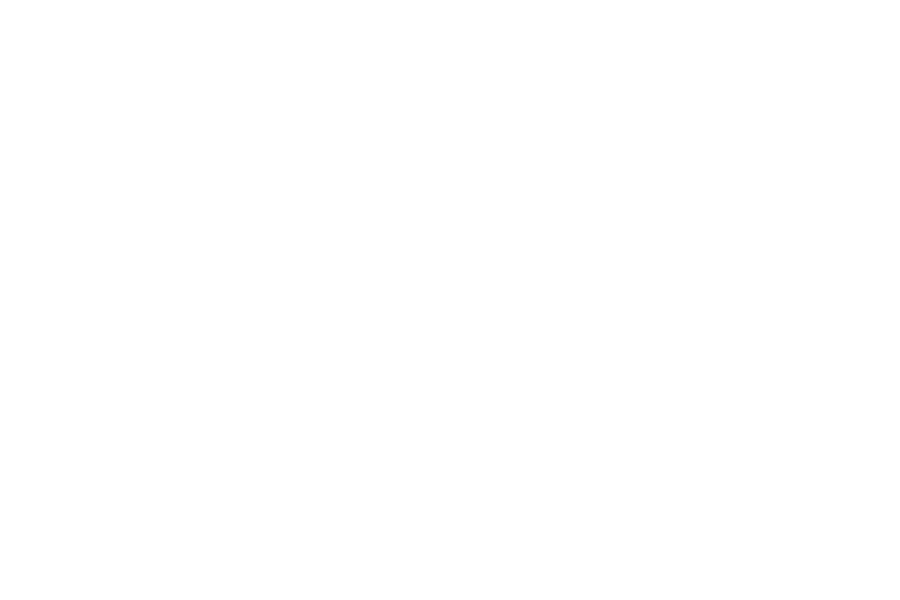

<IPython.core.display.Javascript object>


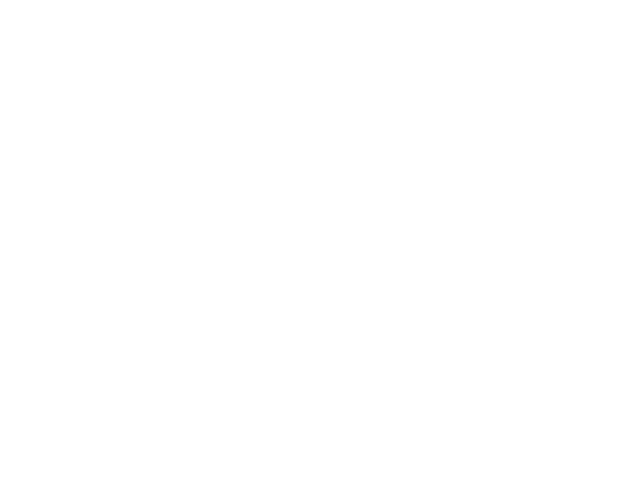

Text(0.5, 0, 'Time [s]')

In [10]:
#Part 4.1 (iLQR vertical orientation)
#Making drone reach vertical orientation come back to origin
horizon_length = 1000
import iLQR
part4Solver1 = iLQR.solver4(horizon_length = horizon_length)
z0 = np.array([0., 0., 0., 0., 0., 0.])
t, state, u = quadrotor.simulate(z0, part4Solver1.vertical_orientation_controller, horizon_length, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAdXxtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzA5NSBiYWVlNDAwIC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMiAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EsVliIQAEf/+94gfMstp+TrXchHnrS6tH1DuRnFepL3+IAAAAwAAAwAAAwAKklieIofxeM38AAAD
AAC3gBewDCAKqAwqPoh2d2dPMAiJHr46cNtWROOk97EYcuOhdjfSGRcSFIT2QQogk1usCkIjgbve
KEdmLhPUrWKiDlZzSnqksdOELAKadiFKpilhtOjafm1mOX1J6uxzeubFMJTVobl6NaV/ZmIE+0nq
+5kR/oUJY96SuN/eI7GD2dh4ALf/96RonpS6nykSdfvgC0XmaI8JeYZinVWAiUyFuUoTV/lcuXFv
UdRea4b58SAMIAk2CCtJYygVVLw4WloMMy9I7rimbOHq8cOgq1+ZwDiLXa5SyHuvA1l78Ejst1tp
oKYWVoobqndaVlkE6AtzpeHooaoGT4NdMi/OacZ1oT+9hVmulCoTm1aUfXAvOmwJVeFoyHDIqUgd
hcLMjnuE3UZeTkAmzvyQvcvS4V4TwI6J0M4V3jLOSh7/uXaHrAQo7Pu4WAAF0AAAGBP9cvR5HyTo
neVEgZxOWGH8uBB6a8H0t4449tL+Kj1sQqmS0zNSyvasfufuCf4BblrJfv449dOwlaLkB/pyX5Cf
PS5b4NgEtLmna2Femi8IOTnq1zBbSmACafl9/aFdeYj0tATelYbP1q9mOdGMbhU3G9EPowkG6gYV
nPRNmHgd6Ndf5evoBjU20uEbkO3QUVPuF4PLZP8nnqy0KIuiVhoQLinTkrRqis8WtrPmCEZAG09t
BnlUGDyrF7431X9Ggsrr4v6OxH3Opz8Upv6jIHjIzP5WqIZIDUCZJTtQl68zbgvt7J2ra/bwZpM6
paowcJtM5ZPE24z39rF9EoPALouyjTBUL7cdrRruf2amRzdb5SfnlyLpNJsUyMUXdvUxZRHKRZsI
nzk9CHf6mmhFzeMa8GeYkaWJcEqg2wO48jlPNGeCIpIkj77FEgAAAwAAAwAAAwAACnRUDZr9qtYv
E/CgEdPBnShcaoVlbvjrHnAdJyQ9/h4Y2MNJLgTeH/2ubsafAQmv/f4fxiuVoM5NHnHCOA54iXCH
kF23qB2RT/9mtKLPwDyxErginenOpAma7GsG6y6lk6cEIKAHUYC1dFOeeYX/OjO/h73WT8xDvoQi
bOpMhvbWf0/13uvhOPhy2RxvdAsmhD2hkt4/+ZmB4NzAOA0YZrzxLorC4DWUlgtWFaQAqClxr6lD
I8CbN2rG9WaoD6f344CRn5XzDeGwleLIOUnMlBF+0ccP9RkqY6i/aA5Vgbrmew/+kHLtlOHE842O
q1qkfNnUjpn+e18lCdEr9QypkDsxYGnAXbIBtDw5dGAgIqP8n7PCr0NCzlqmsbnY3z7B3JnDo6kq
ei3oA+TmQJAABu3dyzB/3xVCARImQkkAD5JZIhABvymDtAQUIt7rH1nPHKLkLbhvTk9IT6FH4SCC
iGYjFxmHR6WAoNFjyaUKodxvESbn3hE4TZ0nN+XYOql3Yz4xLmu4Ws5YZk03VtUeWZ9sFOl8eD1b
ZTEn5rZHecMNohlkivHAATWdTw3DolGULj/hmh37YrqMImNsGUtimQWyTeiDxgPgrbnRVNJvd1NL
OEP0jZkGeZybTRyjC31/9gvHJm0M8eTsemVvPT1bdz5bN3wDJfIB8r9lJEe1zyGpFqNfmCIewsp6
9lJc5hd2k7NZoyZMUncBomQaPr92h1zHadqjwVF197bssfcgxvLfFnAuccafB9tGiDrGNDBcK7yt
A3EZHH10pDl6mNvx/dtP2p4cK9AVb/Kh6nL5kWB8wetr+b+v8kIxYZ6x1ioMVviWKcsCgGZUxV4n
3fxe/47oCEV5nBK21GE6SXo1Y7RBjpDdooLTFzroNUe23FUb++JSTSqzR+bDqjvhmUlh0Ny1WLvl
CQykQABVLz1Zs78zgAAFJr6qe1o2RABcq+QQ1k+tZkPk76bNrYl3JXXK0LeDz0+tBSSCq/n7TF5R
CcQVRwB3kUodXWB9ha9GCcYJVaGWcCRP0oCf8kQUnOCblogrohNJDySSF5zaa96L/Bv6/zXYAuxn
71ofSJxHDTPnx5SzYHwqws2HRZt24nVmJBV3+VBKZf6+NL+IdM+GGa37rf3MT+i2EtslG+FkVOix
03VQEXM0bHs8dpgwemr2ju2SMnXU9AIoJ6W8jhzK/aOf7He6fzckgX136Itsn8IORoP2pWFdSiMG
jU1R/yyXyK7Gdt9dF4aMVSnay5UUcsRvtNnE8DDksmy4r14grmhBaxz8+E00unAtsWmyibeiFk89
Ae5CvQXTFirXQCjf80R5zNUYbwn5P8/qPQYlh0gx9qEiDIygDhtvpYvEBxOQ1ghO02MHw0Zw0RWF
lLHF7pH74ZXNUi/M0iiFtEfq5X7uTJLnlf5Y7tj4l79BJrRjhPU+2et5pDVRqrYKmVJgZ6pI9i1b
1gKfIZh+bkNiae1PrP+89JyGica8oW9tnhi3BByb65KxcN1kSgxu9I0MWOoQP05PZUp1PafdYhb6
c5RiuK2DkLX9KpoURB+cVcSngP9Zri3FxM3wtEEHPA5mznqY6ysRFNbFbTpSwa42SM4KJkevwDEl
emAi2KOIKCrKlyU3fPeXQ+nrxCG/WZa0iKu+WXxzLOd+uzeVR5QZDnMpp1zAR3mK+8AP8N2//Dn5
o8wcF4+sdHyXSabZ68NY+2RmE6nAevbyjdTN4yRgVkxR0eDyUNEoHjX9+fUqxxlE7lIlq+CWa5Ip
wk9D74dtCS/jgcfX5ETu0CykibreMyQYnn2Pk2QnLEYvKdF/2uv/UXF5xc9tPLUf4YGoKrYLAYbT
huxsNG9UIySuUd31iI+P31Nr278aSdIKJZUYjs7ulE8nCWhkxL0L/4NPkJyXpmBESWFD0WizejkY
z0UzN6ZA0ZRoJcAAACD8X

<IPython.core.display.Javascript object>


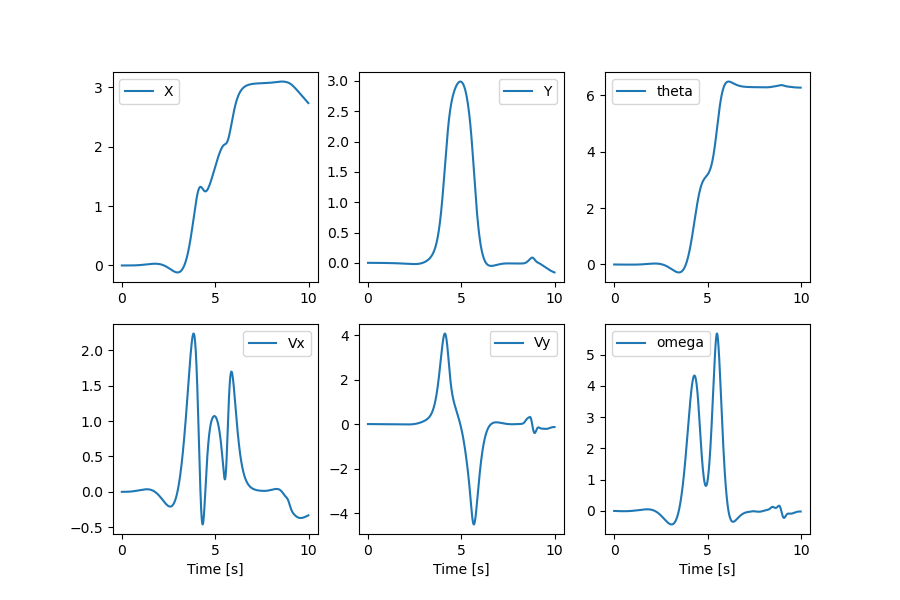

<IPython.core.display.Javascript object>


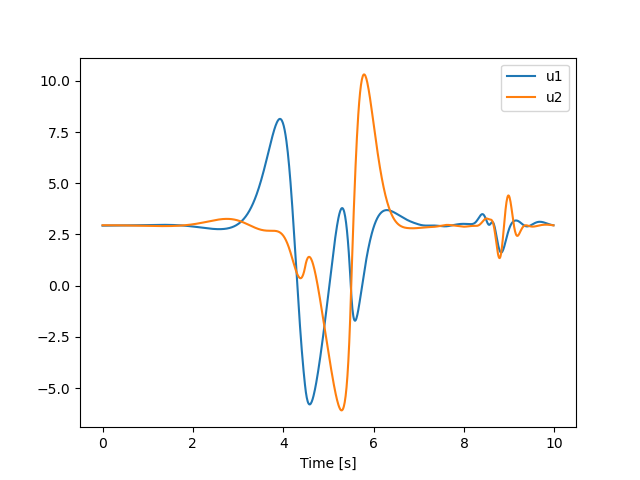

Text(0.5, 0, 'Time [s]')

In [11]:
#Part 4.2 (iLQR full flip)
#Making drone flip fully
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import quadrotor
horizon_length = 1000
import flip
part4Solver = flip.quadSys()
z0 = np.array([0., 0., 0., 0., 0., 0.])
part4Solver.ilrq()
t, state, u = quadrotor.simulate(z0, part4Solver.full_flip_controller, 1000 - 1, disturbance = False)

quadrotor.animate_robot(state,u)

# we can plot the results
plt.figure(figsize=[9,6])

plt.subplot(2,3,1)
plt.plot(t, state[0,:])
plt.legend(['X'])

plt.subplot(2,3,2)
plt.plot(t, state[2,:])
plt.legend(['Y'])

plt.subplot(2,3,3)
plt.plot(t, state[4,:])
plt.legend(["theta"])

plt.subplot(2,3,4)
plt.plot(t, state[1,:])
plt.legend(['Vx'])
plt.xlabel('Time [s]')

plt.subplot(2,3,5)
plt.plot(t, state[3,:])
plt.legend(['Vy'])
plt.xlabel('Time [s]')

plt.subplot(2,3,6)
plt.plot(t, state[5,:])
plt.legend(['omega'])
plt.xlabel('Time [s]')

# we can also plot the control
plt.figure()
plt.plot(t[:-1], u.T)
plt.legend(['u1', 'u2'])
plt.xlabel('Time [s]')